# Matrix Operations

## Creating Vectors and Matrices

We have already seen how to create 1D and 2D arrays in Julia. These can be naturally used to represent vectors and matrices:

In [1]:
x = randn(3)   # Random vector

3-element Array{Float64,1}:
 1.8043080258368742
 1.2729108094256616
 0.644310017473172 

In [2]:
A = randn(3,3) # Random matrix

3×3 Array{Float64,2}:
  0.588901  0.167637  -1.15099
 -0.678913  0.667647  -1.60432
 -0.787747  2.86609   -1.22371

## Basic Matrix Operations

Julia also defines common matrix operations for arrays, some in the base library and some in the `LinearAlgebra` package.

In [3]:
using LinearAlgebra

For example addition, subtraction, and scalar multiplication work as expected:

In [4]:
y = randn(3)
x - 3y

3-element Array{Float64,1}:
 -2.842435135658006
  1.739773813551812
 -1.242498746492078

Note that this happens to be the same operation as the corresponding *elementwise* operation `x .- 3y`, because of the definition of vector addition. However, if you try to multiply two vectors

```julia
z = x * y   # Error - cannot multiply two vectors
```

you get an error. Use can use the `dot` function or the $\cdot$ syntax (type `\cdot` and tab) to compute dot products:

In [5]:
x_dot_y_1 = dot(x,y)   # Dot product
x_dot_y_2 = x ⋅ y      # Same thing

3.001856934497898

For the special case of vectors of length 3, Julia also defines the cross product:

In [6]:
x_cross_y = cross(x,y)

3-element Array{Float64,1}:
  0.9008479271055119 
 -0.13681367615524787
 -2.2524180880675777 

The 2-norm of a vector can be calculated using the `norm` function:

In [7]:
a = norm(x)                 # 2-norm of x
b = sqrt(sum(abs.(x).^2))   # Should be the same
a - b                       # Confirm

0.0

More generally, the `norm` function takes a second argument `p` in which case it computes the $p$-norm:

$$
\|A\|_p = \left( \sum_{i=1}^n | a_i | ^p \right)^{1/p}
$$

This includes the so-called max-norm, by setting `p` to `Inf`.

## Matrix Multiplication

Matrix multiplication is performed using the `*` operator. Recall the definition of the product of two matrices $C=AB$ where $A$ is $m$-by-$k$, $B$ is $k$-by-$n$, and $C$ is $m$-by-$n$: 

$$
C_{ij} = \sum_{\ell=1}^k A_{i\ell} B_{\ell j},\qquad\text{ for }i=1,\ldots,m\text{ and }j=1,\ldots,n
$$

If the "middle dimensions" ($k$ in the example above) do not match, Julia gives an error.

In [8]:
B = randn(4,3)
C = B*A     # OK, since B is 4-by-3 and A is 3-by-3

4×3 Array{Float64,2}:
  0.80787   -1.36908    2.86875 
  1.9197     0.246358  -1.01032 
 -0.771649   2.87346    0.985174
  0.55624   -0.669925   0.673916

Note that unlike addition and subtraction, matrix multiplication is completely different from elementwise multiplication:

In [9]:
AA = A*A     # Square of matrix
A2 = A.*A    # Square of each entry in matrix
A2 - AA      # These are not the same

3×3 Array{Float64,2}:
 -0.792876   3.11629  0.863064
  0.0502101  4.71194  0.900331
  2.0663     9.94022  3.69144 

Similarly, the power `^` operator will compute *matrix powers*, not elementwise powers:

In [10]:
A_to_the_power_of_2 = A^2       # Same as A*A
A_to_the_power_of_3_5 = A^3.5   # A^3.5, much harder to compute!

3×3 Array{Complex{Float64},2}:
    1.57309+1.77636e-15im   5.05275-1.27676e-15im  0.278469+8.88178e-16im
 -0.0690414+1.9984e-15im    10.6151-3.9968e-15im   -1.34836+5.32907e-15im
    3.16091-2.77556e-17im  0.277824-5.32907e-15im    8.8581-1.44329e-15im

Note that Julia automatically returns a matrix of complex numbers when needed (even if the input matrix was real).

## Matrix Transpose

Matrices can be transposed using the `transpose` function, or conjugate transposed using the `adjoint` function or the convenient `'` syntax: 

In [11]:
BT = transpose(B)     # B is 4-by-3, so BT is 3-by-4
BT2 = B'              # Same thing (since B is real so conjugate does not matter)

A * B'                # Well-defined, since A is 3-by-3 and B' is 3-by-4

3×4 Array{Float64,2}:
 -0.327447   0.870474  -2.11866   0.20615 
 -0.447953  -2.63843   -2.23207  -0.244009
 -3.5218    -5.31322   -3.93732  -1.35757 

Since the dot product between two vectors can be written as $z = x^*y$ (conjugate transpose of $x$), matrix multiplication can be used to provide an alternative syntax:

In [12]:
x_dot_y_3 = x' * y

3.001856934497898

In all these examples, the vectors `x` and `y` have been 1D arrays. It is also possible to use 2D arrays (or matrices) to represent vectors, which allows for both column- and row-vectors:

In [13]:
a = randn(3,1)   # Column vector
b = randn(1,3)   # Row vector

1×3 Array{Float64,2}:
 0.77621  -0.0556769  -1.19503

Note that `a' * b` is now invalid because of the dimensions. One option is to do `a' * b'`, but it is generally safer to use the `dot` function to compute the dot product:

In [14]:
a_dot_b = dot(a,b)

-0.01179966396371468

## Other Matrix Operations

The `LinearAlgebra` package defines many other common matrix operations. For example, determinant, trace, and inverse matrix (but note that inverse matrices are often inefficient and ill-conditioned, use `\` instead for solving linear systems):

In [15]:
A = randn(3,3)
println("det(A) = ", det(A))
println("tr(A) = ", tr(A))
println("inv(A) = ", inv(A))

det(A) = 0.3704374734218431
tr(A) = -0.6347425567702447
inv(A) = [-0.95347875018126 1.6652523787071785 0.7985731845981; 0.7406339872995229 -2.815003600706891 -0.39457360187443213; -0.4673978941823733 5.669263906119602 1.5322856332636579]


## Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors can be computed using the functions `eigvals` and `eigvects`. Note that the output of these functions is in general complex, even though the matrices are real.

In [16]:
A = randn(3,3)
lambda = eigvals(A)     # Eigenvalues

3-element Array{Complex{Float64},1}:
 -1.260720284374532 - 0.9888600557825056im
 -1.260720284374532 + 0.9888600557825056im
 1.0585152586110855 + 0.0im               

In [17]:
X = eigvecs(A)          # Eigenvectors

3×3 Array{Complex{Float64},2}:
   0.169405+0.0925806im    0.169405-0.0925806im  -0.656458+0.0im
   0.850646-0.0im          0.850646+0.0im          0.67863+0.0im
 -0.0492494-0.486526im   -0.0492494+0.486526im    0.329431+0.0im

In [18]:
norm(A*X - X*Diagonal(lambda))     # Confirm A*X = X*LAMBDA

2.836573658775847e-15

The `Diagonal` function above is an example of a special matrix in Julia discussed in the next section.

## Example: Eigenvalues of Random Matrices

Random matrix theory studies the distribution of the eigenvalues of certain classes of randomly generated matrices, which have many important applications. For example, matrices with entries from the normal distribution can be shown to have eigenvalues concentrated inside a circle in the complex plane:

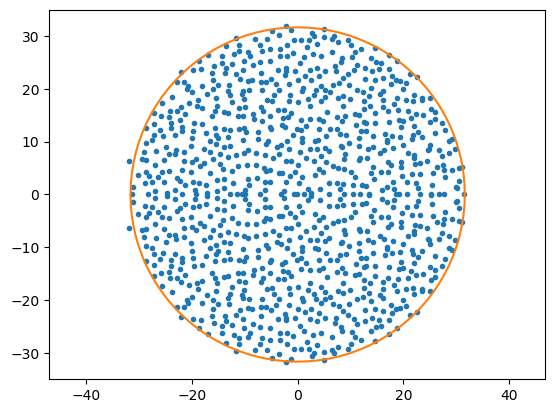

In [21]:
using PyPlot
n = 1000
A = randn(n,n)
l = eigvals(A)
plot(real(l), imag(l), ".")
axis("equal");
# Draw circle
radius = sqrt(n)
phi = 2π*(0:100)/100
plot(radius*cos.(phi), radius*sin.(phi));

## Other data types

We already saw how matrix operations can be performed on complex numbers. Many operations are also defined for rational numbers, which allows for exact linear algebra computations:

In [20]:
num = rand(-10:10, 3, 3)
den = rand(1:10, 3, 3)
rat = num .// den
display(rat)
inv(rat)

3×3 Array{Rational{Int64},2}:
 -3//1  10//9   1//5
  7//5   1//4  -2//1
  0//1  -9//2   3//4

3×3 Array{Rational{Int64},2}:
 -10575//28813   -2080//28813  -8180//86439
  -1260//28813   -2700//28813  -6864//28813
  -7560//28813  -16200//28813  -8300//86439